### 5.1 분류와 회귀
#### 5.1.1 분류(classification)
- 주어진 피처에 따라 어떤 대상을 유한한 범주(타깃값)로 구분하는 방법
- 타깃값이 2개인 분류 : 이진분류(binary classification)
- 타깃값이 3개 이상인 분류 : 다중분류(multiclass classification)

#### 5.1.2 회귀(regression)
- 독립변수와 종속변수 간 관계를 모델링하는 방법
    - 독립변수(independent variable) : 영향을 미치는 변수
    - 종속변수(dependent variable) : 영향을 받는 변수, 수치형 데이터
- 선형회귀(linear regression)
    - 단순 선형 회귀(simple linear regression) : 독립변수 하나와 종속변수 하나 사이의 관계를 나타낸 모델링 기법, ex. $y = \theta_0 + \theta_1x$
    - 다중 선형 회귀(multiple linear regression) : 독립변수 여러 개와 종속변수 하나 사이의 관계를 나타낸 모델링 기법, ex. $y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3$

##### 1) 회귀 평가지표(대부분 평가지표 값이 작을수록 모델 성능이 좋음)
- 평균 절대 오차(MAE) : 실제 타깃값과 예측 타깃값 차의 절댓값 평균
- 평균 제곱 오차(MSE) : 실제 타깃값과 예측 타깂값 차의 제곱의 평균
- 평균 제곱근 오차(RMSE) : MSE에 제곱근을 취한 값
- Mean Squared Log Error(MSLE) : MSE에서 타깃값에 로그를 취한 값
- Root Mean Squared Log Error(RMSLE) : MSLE에 제곱근을 취한 값
- 결정계수($R^2$) : 예측 타깃값의 분산/실제 타깃값의 분산, 다른 지표와 달리 1에 가까울수록 모델 성능이 좋음

In [2]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score # MAE, MSE, MSLE, R2

true  = np.array([1, 2, 3, 2, 3, 5, 4, 6, 5, 6, 7, 8, 8]) # 실젯값
preds = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 7, 7, 6, 8]) # 예측값

MAE   = mean_absolute_error(true, preds)
MSE   = mean_squared_error(true, preds)
RMSE  = np.sqrt(MSE)
MSLE  = mean_squared_log_error(true, preds)
RMSLE = np.sqrt(MSLE)
R2    = r2_score(true, preds)

print(f'MAE:\t {MAE:.4f}')
print(f'MSE:\t {MSE:.4f}')
print(f'RMSE:\t {RMSE:.4f}')
print(f'MSLE:\t {MSLE:.4f}')
print(f'RMSLE:\t {RMSLE:.4f}')
print(f'R2:\t {R2:.4f}')

MAE:	 0.5385
MSE:	 0.6923
RMSE:	 0.8321
MSLE:	 0.0296
RMSLE:	 0.1721
R2:	 0.8617


##### 2) 상관계수(correlation coefficient)
- 두 변수 사이의 상관관계 정도를 수치로 나타낸 값
- 피어슨 상관계수(pearson correlation coefficient) 
    - 선형 상관관계의 강도(strength)와 방향(direction)을 나타냄
    - -1부터 1 사이의 값을 가짐
    - 상관계수가 음수면 음의 상관관계, 양수면 양의 상관관계가 있다고 함

### 5.2 분류 평가지표
#### 5.2.1 오차행렬(confusion matrix) = 혼동 행렬
- 실제 타깃값과 예측한 타깃값이 어떻게 매칭되는지를 보여주는 표(T로 시작하면 올바르게 예측, F로 시작하면 틀림)
    - 참 양성(true positive) = TP : 실제 타깃값이 양성인데 예측도 양성
    - 거짓 음성(false negative) = FN : 실제 타깃값은 양성인데 예측은 음성
    - 거짓 양성(false positive) = FP : 실제 타깃값이 음성인데 예측을 양성
    - 참 음성(true negative) = TN : 실제 타깃값이 음성인데 예측도 음성 

##### 1) 정확도(accuracy)
- 실젯값과 예측값이 얼마나 일치되는지를 비율로 나타낸 평가지표
- 전체 값 중 참 양성(TP)과 참 음성(TN)이 차지하는 비율
- $\frac{TP + TN}{TP + FP + FN + TN}$

##### 2) 정밀도(precision)
- 양성 예측의 정확도
- 양성이라고 예측한 값(TP+FP) 중 실제 양성인 값(TP)의 비율
- $\frac{TP}{TP + FP}$
- 검출하기를 원하는 상태를 보통 양성으로 정함(정상인 상태를 음성)

##### 3) 재현율(recall)
- 민감도(sensitivity), 참 양성 비율(TPR, true positive rate)라고도 함
- 실제 양성 값(TP+FN) 중 양성으로 잘 예측한 값(TP)의 비율
- $\frac{TP}{TP + FN}$

##### 4) F1 점수(F1 score)
- 정밀도와 재현율을 조합한 평가지표
- 정밀도와 재현율의 조화 평균으로 구함
- $F1 = \frac{2}{\frac{1}{정밀도} + \frac{1}{재현율}} = 2 \times \frac{정밀도 \times 재현율}{정밀도 + 재현율}$

#### 5.2.2 로그 손실(logloss)
- 분류 문제에서 타깃값을 확률로 예측할 때 사용하는 평가지표
- 값이 작을수록 좋은 지표
- $logloss = -\frac{1}{N} \displaystyle\sum_{i=1}^{N} (y_ilog(\hat{y_i}) + (1-y_i)log(1-\hat{y_i})) $

#### 5.2.3 ROC 곡선과 AUC
- ROC(Receiver Operationg Characteristic) 곡선 : (참 양성 비율(TPR) = 재현율)에 대한 거짓 양성 비율(FPR, False Positive Rate) 곡선, 민감도에 대한 (1-특이도)곡선
    - ROC 곡선이 가운데 점선과 가까울수록 모델 성능이 떨어지며, 위쪽으로 멀어질수록 성능이 좋음
    - 참 음성 비율(TNR, True Negative Rate)
        - 음성을 얼마나 정확히 예측하는지 나타내는 지표
        - 특이도라고도 함
        - $\frac{TN}{FP+TN}$
    - 거짓 양성 비율(FPR, False Positive Rate) 
        - 1 - 참 음성 비율(TNR), 1 - 특이도
        - $FPR = \frac{FP}{FP+TN} = 1 - \frac{TN}{FP+TN} = 1 - TNR$
- AUC(Area Under the Curve) : ROC 곡선 아래 면적, 예측값이 확률인 분류문제에서 사용
    - FPR, TPR 모두 0부터 1사이의 값을 가짐
    - 100% 완벽하게 분류하면 AUC가 1이고, 완전 무작위로 분류하면 0.5
    - 모델 성능이 좋을수록 AUC가 큼
    - AUC는 예측값의 크기에 따라 결정됨
    - 예측 확률값의 대소 관계 순서가 같으면 AUC도 같음(로그 손실은 예측 확률의 대소 관계 순서가 같아도 확률 값이 다르면 점수가 달라짐)
    - 양성인 타깃값이 부족한 경우에는 양성을 얼마나 잘 예측했는지가 AUC에 영향을 많이 줌

### 5.3 데이터 인코딩
- 범주형 데이터를 숫자 형태로 바꾸는 작업

#### 5.3.1 레이블 인코딩(label encoding)
- 범주형 데이터를 숫자로 일대일 매핑해주는 인코딩 방식

In [3]:
from sklearn.preprocessing import LabelEncoder

fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']

# 레이블 인코더 생성, 2차원 데이터에는 OrdinalEncoder 사용
label_encoder = LabelEncoder() 

# 레이블 인코딩 적용
fruits_label_encoded = label_encoder.fit_transform(fruits)

print('레이블 인코딩 적용 후 데이터 : ', fruits_label_encoded)
# 레이블 인코딩 적용 시 원본 데이터 값에 사전순으로 번호를 매김

레이블 인코딩 적용 후 데이터 :  [3 2 1 0 2 1 1 3]


#### 5.3.2 원-핫 인코딩(one-hot encoding)
- 여러 값 중 하나만 활성화하는 인코딩
    1) 인코딩하려는 피처의 고윳값 개수를 구함
    2) 피처의 고윳값 개수만큼 열을 추가
    3) 각 고윳값에 해당하는 열에 1을 표시하고 나머지 열에는 0을 표시
- 레이블 인코딩의 문제(서로 가까운 숫자를 비슷한 데이터로 판단하는 문제)를 해결
- 열 개수가 지나치게 많아진다는 단점, 모델 훈련 속도가 느려질 수 있음

+) 명목형 피처에 고윳값이 상당히 많을 때 해결방법
- 비슷한 고윳값끼리 그룹화 
- 빈도가 낮은 고윳값을 '기타'(etc)로 처리
- 다른 인코딩 적용(ex. 타깃 인코딩, 프리퀀시 인코딩)

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']

label_encoder = LabelEncoder() 
onehot_encoder = OneHotEncoder()

fruits_label_encoded = label_encoder.fit_transform(fruits)
fruits_onehot_encoded = onehot_encoder.fit_transform(fruits_label_encoded.reshape(-1, 1)) # 문자열 데이터를 숫자형 데이터로 변환

print('원-핫 인코딩 적용 후 데이터 : \n', fruits_onehot_encoded.toarray()) 
# 희소행렬(대부분의 값이 0인 행렬)은 메모리 낭비가 심하기 때문에 OneHotEncoder는 압축된 형태인 CSR(Compressed Sparse Row) 행렬로 돌려줌
# .toarray()는 CSR 형태의 행렬을 일반 배열로 바꿔주는 역할

원-핫 인코딩 적용 후 데이터 : 
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [5]:
fruits_label_encoded.reshape(-1, 1)

array([[3],
       [2],
       [1],
       [0],
       [2],
       [1],
       [1],
       [3]], dtype=int64)

In [9]:
# 판다스의 get_dummies() 함수를 사용해 원-핫 인코딩 적용
import pandas as pd

pd.get_dummies(fruits)

,귤,바나나,블루베리,사과
0,False,False,False,True
1,False,False,True,False
2,False,True,False,False
3,True,False,False,False
4,False,False,True,False
5,False,True,False,False
6,False,True,False,False
7,False,False,False,True


### 5.4 피처 스케일링(feature scaling)
- 서로 다른 피처 값의 범위(최댓값-최솟값)가 일치하도록 조정하는 작업
- 단, 트리 기반 모델(랜덤 포레스트, XGBoost, LightGBM 등)은 피처 스케일링 필요 없음 -> 트리 기반 모델은 데이터의 크기보다 대소 관계에 영향을 받기 때문
#### 5.4.1 min-max 정규화(min-max normalization)
- 피처 값의 범위를 0~1로 조정하는 기법
- 피처 x에서 최솟값을 뺀 뒤, 그 값을 최댓값과 최솟값의 차이로 나눔
- $x_{scaled} = \frac{x - x_{min}}{x_{max}-x_{min}}$
- 이상치가 너무 크거나 작을 때는 표준화가 더 바람직

In [10]:
import pandas as pd

height_weight_dict = {'키': [1.7, 1.5, 1.8], '몸무게': [75, 55, 60]}
df = pd.DataFrame(height_weight_dict, index = ['광일', '혜성', '덕수'])

print(df)

      키  몸무게
광일  1.7   75
혜성  1.5   55
덕수  1.8   60


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df)
df_scaled = scaler.transform(df)
# fit + transform -> fit_transform()으로 한 번에 실행 가능

print(df_scaled)

[[0.66666667 1.        ]
 [0.         0.        ]
 [1.         0.25      ]]


#### 5.4.2 표준화
- 평균이 0, 분산이 1이 되도록 피처 값을 조정하는 기법
- $x_{scaled}=\frac{x-\bar{x}}{\sigma}$

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

print(df_scaled)

[[ 0.26726124  1.37281295]
 [-1.33630621 -0.98058068]
 [ 1.06904497 -0.39223227]]


### 5.5 교차 검증
- 훈련 데이터를 여러 그룹으로 나누어 일부는 훈련 시 사용하고, 일부는 검증 시 사용해서 모델 성능을 측정하는 기법
#### 5.5.1 K 폴드 교차 검증(K-Fold Cross Validation)
1. 전체 훈련 데이터를 K개 그룹으로 나눔
2. 그룹 하나는 검증 데이터로, 나머지 K-1개는 훈련 데이터로 지정
3. 훈련 데이터로 모델을 훈련하고, 검증 데이터로 평가
4. 평가점수를 기록
5. 검증 데이터를 다른 그룹으로 바꿔가며 2~4 절차를 K번 반복
6. K개 검증 평가점수의 평균을 구함

In [15]:
import numpy as np
from sklearn.model_selection import KFold

data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

folds = KFold(n_splits = 5, shuffle = False)

for train_idx, valid_idx in folds.split(data):
    print(f'훈련 데이터: {data[train_idx]}, 검증 데이터: {data[valid_idx]}')

훈련 데이터: [2 3 4 5 6 7 8 9], 검증 데이터: [0 1]
훈련 데이터: [0 1 4 5 6 7 8 9], 검증 데이터: [2 3]
훈련 데이터: [0 1 2 3 6 7 8 9], 검증 데이터: [4 5]
훈련 데이터: [0 1 2 3 4 5 8 9], 검증 데이터: [6 7]
훈련 데이터: [0 1 2 3 4 5 6 7], 검증 데이터: [8 9]


In [17]:
folds = KFold(n_splits = 5, shuffle = True)

for train_idx, valid_idx in folds.split(data):
    print(f'훈련 데이터: {data[train_idx]}, 검증 데이터: {data[valid_idx]}')

훈련 데이터: [0 1 3 4 5 6 7 9], 검증 데이터: [2 8]
훈련 데이터: [0 1 2 3 5 7 8 9], 검증 데이터: [4 6]
훈련 데이터: [0 2 3 4 5 6 8 9], 검증 데이터: [1 7]
훈련 데이터: [0 1 2 3 4 6 7 8], 검증 데이터: [5 9]
훈련 데이터: [1 2 4 5 6 7 8 9], 검증 데이터: [0 3]


#### 5.5.2 층화 K 폴드 교차 검증(Stratified K-Fold Cross Validation)
- 타깃값이 골고루 분포되게 폴드를 나누는 방법
- 타깃값이 불균형하게 분포되어 있는 경우 사용하는 것이 좋음
- ex. 스팸 메일: 건수가 매우 적은 스팸 메일과 일반 메일을 특정 비율로 모아 폴드로 만듦

In [18]:
# K 폴드 교차검증
y = np.array(['스팸'] * 5 + ['일반'] * 45)

folds = KFold(n_splits = 5, shuffle = True)

for idx, (train_idx, valid_idx) in enumerate(folds.split(y)):
    print(f'Fold {idx+1} 검증 데이터 타깃값: ')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃값: 
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃값: 
['스팸' '스팸' '스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃값: 
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃값: 
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃값: 
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



In [19]:
# 층화 K 폴드 교차검증 -> 폴드 별 스팸과 일반 메일의 비율이 동일
from sklearn.model_selection import StratifiedKFold

X = np.array(range(50)) 
y = np.array(['스팸'] * 5 + ['일반'] * 45)

folds = StratifiedKFold(n_splits = 5)

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print(f'Fold {idx+1} 검증 데이터 타깃값: ')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃값: 
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃값: 
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃값: 
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃값: 
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃값: 
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



### 5.6 주요 머신러닝 모델
#### 5.6.1 선형 회귀 모델(Linear Regression)
##### 1) 데이터 생성

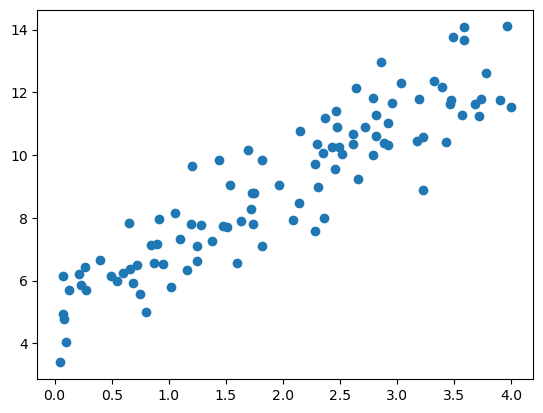

In [20]:
# 단순 선형 회귀식 y = 2x + 5에 근사하는 데이터 생성
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

w0 = 5
w1 = 2
noise = np.random.randn(100, 1)

x = 4 * np.random.rand(100, 1) # 0~4 사이 실숫값 100개 생성 
y = w1*x + w0 + noise

plt.scatter(x, y)

##### 2) 모델 훈련

In [21]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(x, y)

print('y절편(w0): ', linear_reg_model.intercept_)
print('회귀계수(w1): ', linear_reg_model.coef_)

y절편(w0):  [5.09772262]
회귀계수(w1):  [[1.9808382]]


##### 3) 회귀선 확인

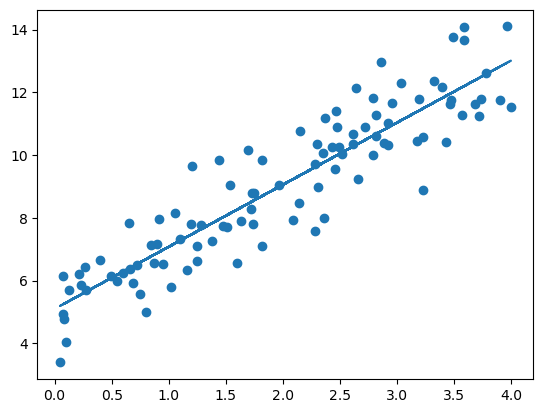

In [22]:
y_pred = linear_reg_model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred)

#### 5.6.2 로지스틱 회귀 모델(Logistic Regression)
- 선형 회귀 방식을 응용해 분류에 적용한 모델
- 시그모이드 함수(sigmoid function)를 활용해 타깃값에 포함될 확률을 예측
- $p = \frac{1}{1+e^{-x}}$
- S자 모양의 그래프, 0에서 1사이의 값을 가짐
- x값이 작을수록 0에 가깝고, 클수록 1에 가까움. x가 0일 땐 0.5
- 시그모이드 값(확률)이 0.5보다 작으면 0(음성), 0.5 이상이면 1(양성)이라고 예측
- 사이킷런의 LogisticRegression

#### 5.6.3 결정 트리(decision tree)
- 분류와 회귀 문제에 모두 사용 가능한 모델
1. 데이터를 가장 잘 구분하는 조건을 정함
2. 조건을 기준으로 데이터를 두 범주로 나눔
3. 나뉜 각 범주의 데이터를 잘 구분하는 조건을 다시 정함
4. 조건에 따라 각 범주에 속한 데이터를 다시 분할
5. 위 방식으로 계속 분할해 최종 결정 값을 구함
- 뿌리 노드(root node) : 첫 번째 노드
- 중간 노드(intermediate node) : 조건이 담긴 중간층 노드
- 말단 노드(leaf node) : 결정 값이 담긴 마지막 노드

##### 1) 결정 트리 분할 방식
- 결정 트리는 노드 내 데이터의 불순도를 최소화하는 방향으로 분할
    - 불순도(impurity) : 한 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 나타내는 정도(서로 다른 데이터가 같은 비율로 있다면 불순도가 최대)
    - 엔트로피(entropy) : 불확실한 정도
        - 한 범주에 데이터가 한 종류만 있다면 엔트로피는 0
        - 엔트로피 값이 클수록 불순도가 높음
        - 결정 트리는 정보 이득을 최대화하는 방향(엔트로피를 최소화하는 방향)으로 노드를 분할
        - 정보 이득(information gain) : 1 - 엔트로피
    - 지니 불순도(gini impurity) : 지니 불순도 값이 클수록 불순도가 높음

##### 2) 결정 트리 구현
- 분류용 모델 : 사이킷런 DecisionTreeClassifier
    - criterion : 분할 시 사용할 불순도 측정 지표
    - max_depth : 트리의 최대 깊이
    - min_samples_split : 노드 분할을 위한 최소 데이터 개수
    - min_samples_leaf : 말단 노드가 되기 위한 최소 데이터 개수
    - max_features : 분할에 사용할 피처 개수
- 회귀용 모델 : 사이킷런 DecisionTreeRegressor

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 load
cancer_data = load_breast_cancer()

In [28]:
# 훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], cancer_data['target'], stratify = cancer_data['target'], test_size = 0.4, random_state = 42)

decisiontree = DecisionTreeClassifier(random_state = 42) # 결정 트리 정의
decisiontree.fit(X_train, y_train) # 모델 훈련

# 정확도 측정
accuracy = decisiontree.score(X_test, y_test)

print(f'결정 트리 정확도: {accuracy:.3f}')

결정 트리 정확도: 0.930


#### 5.6.4 앙상블 학습(ensemble learning)
##### 1) 보팅(voting)
- 서로 다른 모델로 예측한 개별 결과를 종합해 최종 결과를 결정하는 방식
- 하드 보팅(hard voting) : 다수결 투표 방식으로 최종 예측값을 정함
- 소프트 보팅(soft voting) : 개별 예측 확률들의 평균을 최종 예측확률로 정하는 방식, 하드보팅보다 성능이 좋아 대체로 소프트 보팅을 사용
##### 2) 배깅(bagging)
- 개별 모델이 서로 다른 샘플링 데이터를 활용
1. 전체 훈련 데이터셋에서 무작위 샘플링한 데이터로 개별 모델을 훈련
2. 훈련된 개별 모델로 결과를 예측
3. 개별 모델의 수만큼 1~2번 작업을 반복
4. 각 모델이 예측한 값들을 보팅하여 최종 예측값을 구함
- 배깅 기법을 활용한 대표적인 모델이 렌덤 포레스트
##### 3) 부스팅(boosting) 
- 가중치를 활용해 분류 성능이 약한 모델을 강하게 만드는 기법
- 모델 간 협력이 이루어지며, 이전 모델이 잘못 예측한 데이터에 가중치를 부여하여 다음 모델이 가중치가 부여된 데이터를 더 집중해 훈련
1. '+'와 '-'로 구성된 원본 데이터셋을 준비
2. 처음에는 모든 데이터에 동일한 가중치를 줌
3. 분류 모델1로 '+'와 '-'를 분류
4. 분류 모델1이 잘못 분류한 데이터에 더 높은 가중치를 부여
5. 분류 모델2는 가중치가 부여된 데이터에 집중해 데이터를 분류
6. 분류 모델2가 잘못 분류한 데이터에 더욱 높은 가중치를 부여
7. 분류 모델3은 이전 단계에서 가중치가 부여된 데이터에 집중해 데이터를 분류
- 부스팅 기법을 활용한 대표적인 모델로는 XGBoost와 LightGBM 등이 있음 